In [1]:
library(tidyverse)
library(ggplot2)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

<U+221A> ggplot2 3.3.3     <U+221A> purrr   0.3.4
<U+221A> tibble  3.0.4     <U+221A> dplyr   1.0.2
<U+221A> tidyr   1.1.2     <U+221A> stringr 1.4.0
<U+221A> readr   1.4.0     <U+221A> forcats 0.5.0

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## Câu 1

In [2]:
data = read.csv('data/houses_to_rent.csv', row.names = 1)

In [3]:
head(data)

,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,property.tax,fire.insurance,total
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,1,240,3,3,4,NA,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,NA,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,NA,0,NA,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
5,1,13,1,NA,0,2,acept,not furnished,R$0,"R$2,200",R$42,R$28,"R$2,270"


In [4]:
tail(data)

,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,property.tax,fire.insurance,total
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
6074,0,28,1,1,0,NA,not acept,furnished,R$0,"R$1,390",R$0,R$18,"R$1,408"
6075,1,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6076,1,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6077,0,48,1,1,0,13,acept,not furnished,R$250,R$950,R$42,R$13,"R$1,255"
6078,1,160,3,2,2,NA,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"
6079,1,60,2,1,1,4,acept,furnished,R$489,"R$1,900",R$0,R$25,"R$2,414"


In [5]:
str(data)

'data.frame':	6080 obs. of  13 variables:
 $ city          : int  1 0 1 1 1 1 1 1 1 1 ...
 $ area          : int  240 64 443 73 19 13 55 55 82 32 ...
 $ rooms         : int  3 2 5 2 1 1 1 2 3 1 ...
 $ bathroom      : int  3 1 5 NA NA NA NA NA NA NA ...
 $ parking.spaces: int  4 1 4 1 0 0 1 1 1 1 ...
 $ floor         : int  NA 10 3 12 NA 2 2 2 3 16 ...
 $ animal        : chr  "acept" "acept" "acept" "acept" ...
 $ furniture     : chr  "furnished" "not furnished" "furnished" "not furnished" ...
 $ hoa           : chr  "R$0" "R$540" "R$4,172" "R$700" ...
 $ rent.amount   : chr  "R$8,000" "R$820" "R$7,000" "R$1,250" ...
 $ property.tax  : chr  "R$1,000" "R$122" "R$1,417" "R$150" ...
 $ fire.insurance: chr  "R$121" "R$11" "R$89" "R$16" ...
 $ total         : chr  "R$9,121" "R$1,493" "R$12,680" "R$2,116" ...


In [6]:
summary(data)

      city             area             rooms           bathroom     
 Min.   :0.0000   Min.   :   10.0   Min.   : 1.000   Min.   : 1.000  
 1st Qu.:1.0000   1st Qu.:   58.0   1st Qu.: 2.000   1st Qu.: 1.000  
 Median :1.0000   Median :  100.0   Median : 3.000   Median : 2.000  
 Mean   :0.8633   Mean   :  151.2   Mean   : 2.493   Mean   : 2.347  
 3rd Qu.:1.0000   3rd Qu.:  200.0   3rd Qu.: 3.000   3rd Qu.: 3.000  
 Max.   :1.0000   Max.   :24606.0   Max.   :10.000   Max.   :10.000  
                  NA's   :17                         NA's   :121     
 parking.spaces       floor           animal           furniture        
 Min.   : 0.000   Min.   : 1.000   Length:6080        Length:6080       
 1st Qu.: 1.000   1st Qu.: 3.000   Class :character   Class :character  
 Median : 1.000   Median : 6.000   Mode  :character   Mode  :character  
 Mean   : 1.756   Mean   : 7.621                                        
 3rd Qu.: 2.000   3rd Qu.:11.000                                        
 M

## Câu 2

In [7]:
print(paste("cols:", ncol(data)))
print(paste("rows:", nrow(data)))

[1] "cols: 13"
[1] "rows: 6080"


## Câu 3

In [8]:
head(arrange(count(data, rooms, name = "room_counts"), desc(room_counts)), 5)

,rooms,room_counts
,<int>,<int>
1,3,1994
2,2,1621
3,1,1398
4,4,879
5,5,143


## Câu 4

In [9]:
missing_cols = colnames(data)[!complete.cases(t(data))]
missing_cols

[1] "area"     "bathroom" "floor"

## Câu 5

In [10]:
drop_cols = c("property.tax", "fire.insurance", "total")
data[, drop_cols]  = NULL
head(data)

,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
0,1,240,3,3,4,NA,acept,furnished,R$0,"R$8,000"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000"
3,1,73,2,NA,1,12,acept,not furnished,R$700,"R$1,250"
4,1,19,1,NA,0,NA,not acept,not furnished,R$0,"R$1,200"
5,1,13,1,NA,0,2,acept,not furnished,R$0,"R$2,200"


## Câu 6

In [11]:
data = mutate(data, rent_amount = as.integer(gsub(",","",substring(data$rent.amount, 3))))
head(data)

,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,rent_amount
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,240,3,3,4,NA,acept,furnished,R$0,"R$8,000",8000
2,0,64,2,1,1,10,acept,not furnished,R$540,R$820,820
3,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000",7000
4,1,73,2,NA,1,12,acept,not furnished,R$700,"R$1,250",1250
5,1,19,1,NA,0,NA,not acept,not furnished,R$0,"R$1,200",1200
6,1,13,1,NA,0,2,acept,not furnished,R$0,"R$2,200",2200


## Câu 7

In [12]:
group = group_by(data, furniture)
summary = summarize(group, count = n())
summary

`summarise()` ungrouping output (override with `.groups` argument)



furniture,count
<chr>,<int>
furnished,1582
not furnished,4498


In [13]:
group = group_by(data, furniture, animal)
summary = summarize(group, count = n())
summary

`summarise()` regrouping output by 'furniture' (override with `.groups` argument)



furniture,animal,count
<chr>,<chr>,<int>
furnished,acept,1130
furnished,not acept,452
not furnished,acept,3536
not furnished,not acept,962


## Câu 8

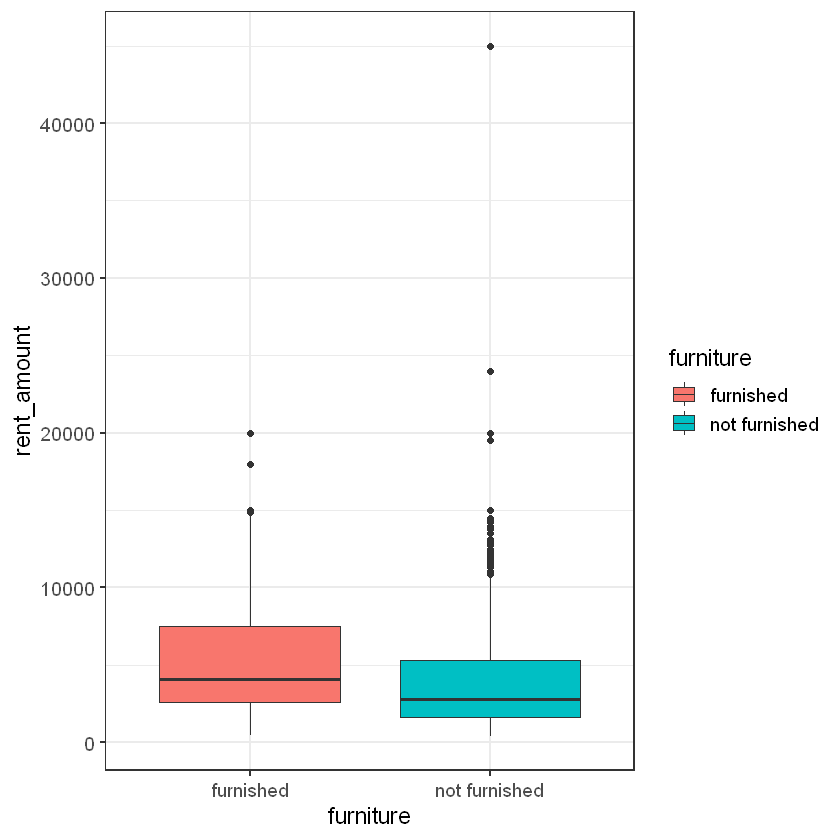

In [14]:
ggplot(data = data, aes(x = furniture, y = rent_amount, fill = furniture)) +
geom_boxplot() +
theme_bw(base_size = 14)

## Câu 9

In [15]:
data$rent_amount[is.na(data$rent_amount)]<-median(data$rent_amount,na.rm=TRUE)

## Câu 10

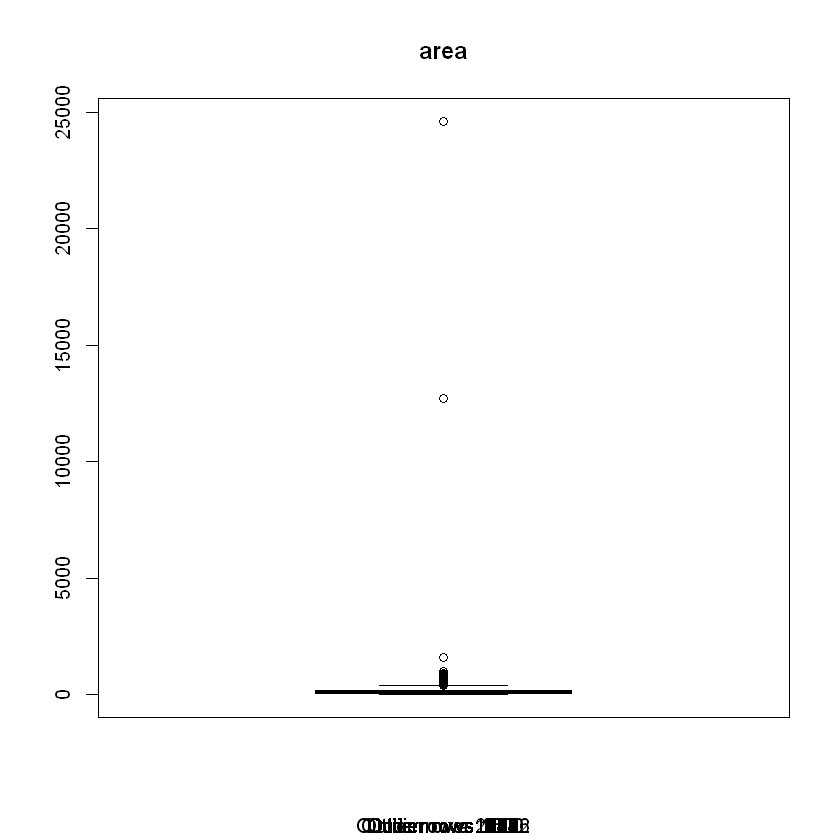

In [16]:
boxplot(data$area, main = "area", 
        sub = paste("Outlier rows:", boxplot.stats(data$area)$out))

In [17]:
outlier_amount = length(boxplot.stats(data$area)$out)
row = nrow(data)

print(paste("Data with area outlier:", row))
print(paste("Data with area outlier:", nrow(data) - outlier_amount))
print(paste("Number of area outlier rows:", outlier_amount))

[1] "Data with area outlier: 6080"
[1] "Data with area outlier: 5835"
[1] "Number of area outlier rows: 245"


## Câu 11